<h3> Sri Kresna Maha Dewa

<h1> Import Library </h1>
Import beberapa library yang akan kita pakai di project kali ini

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

Mari donwload terlebih dahulu datasetnya

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srikresna","key":"c90f9c19af6b129911ae9410dd23cde4"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d zygmunt/goodbooks-10k

 69% 8.00M/11.6M [00:00<00:00, 71.0MB/s]
100% 11.6M/11.6M [00:00<00:00, 78.9MB/s]


In [ ]:
!unzip /content/goodbooks-10k.zip

Archive:  /content/goodbooks-10k.zip
  inflating: book_tags.csv           
  inflating: books.csv               
  inflating: ratings.csv             
  inflating: sample_book.xml         
  inflating: tags.csv                
  inflating: to_read.csv             


simpan datasetnya kedalam variabel agar dapat kita akses lebih lanjut kedepannya

In [ ]:
buku = pd.read_csv('/content/books.csv')
genre = pd.read_csv('/content/book_tags.csv')
tags_genre = pd.read_csv('/content/tags.csv')
user = pd.read_csv('/content/to_read.csv')
rating = pd.read_csv('/content/ratings.csv')


<h1>Data Understanding</h1>

mari cek detail dari data yang kit punya

In [ ]:
buku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [ ]:
buku.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
buku.shape

(10000, 23)

CEK jumlah buku dan author yang ada

In [ ]:
print('Jumlah buku: ', len(buku.book_id.unique()))
print('Jumlah author: ', len(buku.authors.unique()))

Jumlah buku:  10000
Jumlah author:  4664


In [ ]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [ ]:
genre.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [ ]:
genre.shape

(999912, 3)

CEK jumlah genre yang ada di dataset

In [ ]:
print('Jumlah genre buku: ', len(genre.tag_id.unique()))

Jumlah genre buku:  34252


In [ ]:
tags_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


In [ ]:
tags_genre.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [ ]:
tags_genre.shape

(34252, 2)

In [ ]:
print('Jumlah jenis genre buku: ', len(tags_genre.tag_name.unique()))

Jumlah jenis genre buku:  34252


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [ ]:
rating.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
rating.shape

(981756, 3)

In [ ]:
rate = rating.groupby('rating').count()
rate

,book_id,user_id
rating,,
1,19575,19575
2,63231,63231
3,248623,248623
4,357366,357366
5,292961,292961


LIHAT bagaimana seberan rating dari dataset

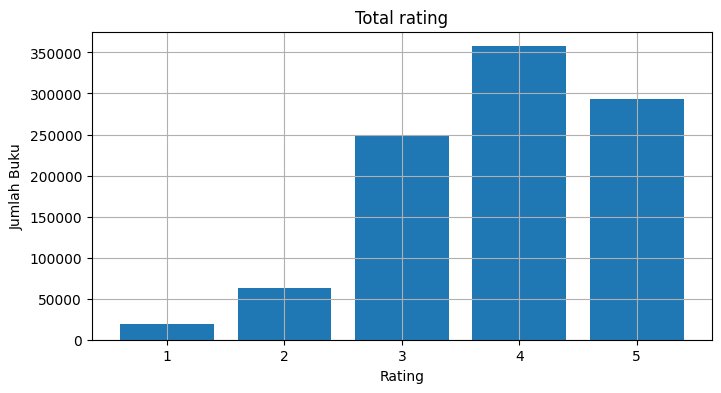

In [ ]:
plt.figure(figsize=(8,4))
plt.title('Total rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah Buku')
plt.bar(rate.index, rate['book_id'])
plt.grid(True)
plt.show()

**Dataset users**

In [ ]:
user.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB


In [ ]:
user.describe()

,user_id,book_id
count,912705.000000,912705.000000
mean,27668.980115,2454.739538
std,14775.096388,2626.359921
min,1.000000,1.000000
25%,15507.000000,360.000000
50%,27799.000000,1381.000000
75%,40220.000000,3843.000000
max,53424.000000,10000.000000


TOTAL User yang ada di dataset

In [ ]:
print('Jumlah user: ', len(user.user_id.unique()))

Jumlah user:  48871


gabungkan tag id

In [ ]:
tags = np.concatenate((
    genre.tag_id.unique(),
    tags_genre.tag_id.unique()
))

tags = np.sort(np.unique(tags))

print('Jumlah genre berdasarkan tag_id: ', len(tags))

Jumlah genre berdasarkan tag_id:  34252


jumlah rating

In [ ]:
books = pd.merge(rating, buku, on='book_id', how='left')
books

,book_id,user_id,rating,id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,314,5,27.0,1.0,41335427.0,275.0,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",...,1678823.0,1785676.0,27520.0,7308.0,21516.0,136333.0,459028.0,1161491.0,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
1,1,439,3,27.0,1.0,41335427.0,275.0,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",...,1678823.0,1785676.0,27520.0,7308.0,21516.0,136333.0,459028.0,1161491.0,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
2,1,588,5,27.0,1.0,41335427.0,275.0,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",...,1678823.0,1785676.0,27520.0,7308.0,21516.0,136333.0,459028.0,1161491.0,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
3,1,1169,4,27.0,1.0,41335427.0,275.0,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",...,1678823.0,1785676.0,27520.0,7308.0,21516.0,136333.0,459028.0,1161491.0,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
4,1,1185,4,27.0,1.0,41335427.0,275.0,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",...,1678823.0,1785676.0,27520.0,7308.0,21516.0,136333.0,459028.0,1161491.0,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981751,10000,48386,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981752,10000,49007,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981753,10000,49383,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981754,10000,50124,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


melihat missing value / NaN

In [ ]:
books.isnull().sum()

book_id                           0
user_id                           0
rating                            0
id                           902055
best_book_id                 902055
work_id                      902055
books_count                  902055
isbn                         902934
isbn13                       902453
authors                      902055
original_publication_year    902155
original_title               903836
title                        902055
language_code                913194
average_rating               902055
ratings_count                902055
work_ratings_count           902055
work_text_reviews_count      902055
ratings_1                    902055
ratings_2                    902055
ratings_3                    902055
ratings_4                    902055
ratings_5                    902055
image_url                    902055
small_image_url              902055
dtype: int64

Bersihkan missing value

In [ ]:
books = books.dropna()

In [ ]:
books.groupby('book_id').sum()

,user_id,rating,id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
book_id,,,,,,,,,,,,,,,,,
1,2590897,424,2700.0,100.0,4.133543e+09,27500.0,9.780440e+14,200500.0,454.00,167882300.0,178567600.0,2752000.0,730800.0,2151600.0,13633300.0,45902800.0,116149100.0
2,2534124,421,2100.0,200.0,2.809203e+08,30700.0,9.780439e+14,200300.0,446.00,173536800.0,184054800.0,2868500.0,952800.0,3157700.0,18021000.0,49442700.0,112480600.0
3,2463015,309,200.0,300.0,4.640799e+08,49100.0,9.780440e+14,199700.0,444.00,460247900.0,480006500.0,7586700.0,7550400.0,10167600.0,45502400.0,115631800.0,301154300.0
5,2399797,389,1800.0,500.0,2.402163e+08,37600.0,9.780440e+14,199900.0,453.00,183282300.0,196937500.0,3609900.0,671600.0,2041300.0,16612900.0,50944700.0,126667000.0
6,2909620,409,2400.0,600.0,3.046572e+08,33200.0,9.780439e+14,200000.0,453.00,175304300.0,186864200.0,3108400.0,667600.0,2021000.0,15178500.0,49492600.0,119504500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,2561149,370,561462.0,931916.0,1.230413e+08,1974.0,9.193511e+14,187436.0,318.66,1212412.0,1379356.0,44838.0,56024.0,197400.0,502148.0,406456.0,217328.0
9915,2601658,331,171720.0,892350.0,1.031580e+08,8640.0,8.802612e+14,178650.0,322.20,4138020.0,4608720.0,241560.0,163800.0,484110.0,1386000.0,1646280.0,928530.0
9943,3381449,397,279460.0,884927.0,2.682872e+08,2670.0,8.704950e+14,177733.0,379.14,2603250.0,2706668.0,96387.0,28569.0,84461.0,388396.0,853777.0,1351465.0


gabungkan Data dengan Judul, Penulis, dan Tahun Terbit Buku

In [ ]:
rate = rating
rate

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


Gabungkan dataset yang terpisah-pisah menjadi satu melalui book_id

In [ ]:
df = pd.merge(rating, books[['book_id', 'authors', 'title', 'original_publication_year']], on='book_id', how='left')
df

,book_id,user_id,rating,authors,title,original_publication_year
0,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
1,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
2,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
3,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
4,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
...,...,...,...,...,...,...
7463407,10000,48386,5,NaN,NaN,NaN
7463408,10000,49007,4,NaN,NaN,NaN
7463409,10000,49383,5,NaN,NaN,NaN
7463410,10000,50124,5,NaN,NaN,NaN


Cek kembali missing value nya

In [ ]:
df.isnull().sum()

book_id                           0
user_id                           0
rating                            0
authors                      915278
title                        915278
original_publication_year    915278
dtype: int64

In [ ]:
#menghapus data yang bernilai kosong
df = df.dropna()

In [ ]:
#menghapus data yang duplikat
df = df.drop_duplicates('book_id')
df

,book_id,user_id,rating,authors,title,original_publication_year
0,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,2005.0
10000,2,1169,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Order of the Phoenix (Har...,2003.0
20000,3,314,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,1997.0
30100,5,314,4,"J.K. Rowling, Mary GrandPré, Rufus Beck",Harry Potter and the Prisoner of Azkaban (Harr...,1999.0
40100,6,173,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Goblet of Fire (Harry Pot...,2000.0
...,...,...,...,...,...,...
7413538,9914,2175,4,Bret Easton Ellis,The Informers,1994.0
7422374,9915,2480,4,Bret Easton Ellis,Less Than Zero,1985.0
7432955,9943,7173,5,Francine Rivers,The Atonement Child,1997.0
7442072,9957,138,4,Ian McEwan,The Cement Garden,1978.0


mnegubah user_id menjadi list unique dan melakukan encoding


In [ ]:
dr = rating

In [ ]:
id_user = dr['user_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(id_user)}
user_encoded_to_user = {i: x for i, x in enumerate(id_user)}

mengubah book_id menjadi list unique dan melakukan encoding

In [ ]:
id_buku = dr['book_id'].unique().tolist()
buku_to_buku_encoded = {x: i for i, x in enumerate(id_buku)}
buku_encoded_to_buku = {i: x for i, x in enumerate(id_buku)}

Mendapatkan jumlah readers

In [ ]:
num_readers = len(user_to_user_encoded)
print(num_readers)

53424


Mendapatkan jumlah resto

In [ ]:
num_books = len(buku_encoded_to_buku)
print(num_books)

10000


Mengubah rating menjadi nilai float


In [ ]:
dr['rating'] = dr['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(dr['rating'])

# Nilai maksimal rating
max_rating = max(dr['rating'])

min_rating, max_rating

(1.0, 5.0)

acak

In [ ]:
dr = dr.sample(frac=1, random_state=42)
dr

,book_id,user_id,rating
646451,6495,19643,5.0
614851,6175,8563,4.0
974393,9920,52110,3.0
21471,215,33864,5.0
272540,2728,16587,3.0
...,...,...,...
259178,2594,26266,4.0
365838,3663,27212,5.0
131932,1320,31839,4.0
671155,6746,34952,2.0


splitting

In [ ]:
x = dr[['user_id', 'book_id']].values
y = dr['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

In [ ]:
train_indices = int(0.8 * dr.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

buat model

In [ ]:
from tensorflow.keras import layers, models, optimizers, regularizers

class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_books, embedding_size, learning_rate=0.001, dropout_rate=0.2, regularization_rate=1e-5, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)

        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size

        # Embedding layers with regularizers
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=regularizers.l2(regularization_rate)
        )
        self.user_bias = layers.Embedding(num_users, 1)

        self.book_embedding = layers.Embedding(
            num_books,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=regularizers.l2(regularization_rate)
        )
        self.book_bias = layers.Embedding(num_books, 1)

        # Dropout layers
        self.dropout_user = layers.Dropout(dropout_rate)
        self.dropout_book = layers.Dropout(dropout_rate)

        # Learning rate for optimizer
        self.optimizer = optimizers.Adam(learning_rate=learning_rate)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_vector = self.dropout_user(user_vector)
        user_bias = self.user_bias(inputs[:, 0])

        book_vector = self.book_embedding(inputs[:, 1])
        book_vector = self.dropout_book(book_vector)
        book_bias = self.book_bias(inputs[:, 1])

        dot_user_book = tf.tensordot(user_vector, book_vector, 2)
        x = dot_user_book + user_bias + book_bias

        return tf.nn.sigmoid(x)


compile model

In [ ]:
model = RecommenderNet(num_readers, num_books, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

training

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 128,
    epochs = 10,
    validation_data = (x_val, y_val)
)


Epoch 1/10
6136/6136 [==============================] - 45s 6ms/step - loss: 0.6267 - root_mean_squared_error: 0.2536 - val_loss: 0.6162 - val_root_mean_squared_error: 0.2308
Epoch 2/10
6136/6136 [==============================] - 34s 6ms/step - loss: 0.6321 - root_mean_squared_error: 0.2314 - val_loss: 0.6465 - val_root_mean_squared_error: 0.2317
Epoch 3/10
6136/6136 [==============================] - 32s 5ms/step - loss: 0.6706 - root_mean_squared_error: 0.2397 - val_loss: 0.6827 - val_root_mean_squared_error: 0.2401
Epoch 4/10
6136/6136 [==============================] - 33s 5ms/step - loss: 0.7201 - root_mean_squared_error: 0.2556 - val_loss: 0.7252 - val_root_mean_squared_error: 0.2545
Epoch 5/10
6136/6136 [==============================] - 35s 6ms/step - loss: 0.7687 - root_mean_squared_error: 0.2697 - val_loss: 0.7616 - val_root_mean_squared_error: 0.2629
Epoch 6/10
6136/6136 [==============================] - 32s 5ms/step - loss: 0.8270 - root_mean_squared_error: 0.2859 - val_l

plot kinerja model

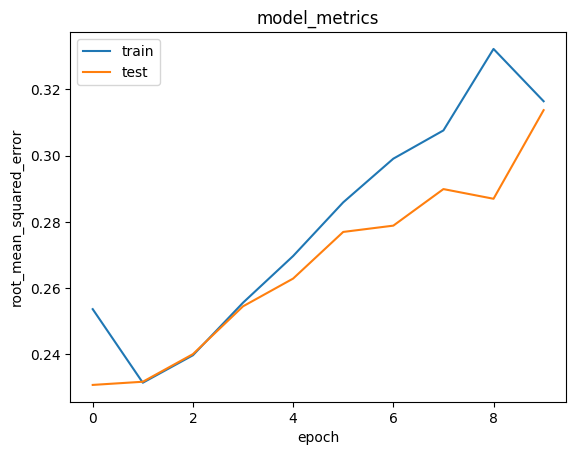

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
book_df = df
data = pd.read_csv('/content/ratings.csv')

In [ ]:
# Mengambil sample user
id_pembaca = data.user_id.sample(1).iloc[0]
book_read_by_user = data[data.user_id == id_pembaca]

In [ ]:
id_pembaca, book_read_by_user

In [ ]:
book_df

In [ ]:
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
book_not_read = book_df[~book_df['book_id'].isin(book_read_by_user.book_id.values)]['book_id']
book_not_read = list(
    set(book_not_read)
    .intersection(set(buku_to_buku_encoded.keys()))
)


In [ ]:
book_not_read = [[buku_to_buku_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(id_pembaca)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

In [ ]:
user_book_array.shape

(677, 2)

In [ ]:
rate_buku = model.predict(user_book_array).flatten()

top_ratings_indices = rate_buku.argsort()[-10:][::-1]
recommended_book_ids = [
    buku_encoded_to_buku.get(book_not_read[x][0]) for x in top_ratings_indices
]

22/22 [==============================] - 0s 2ms/step


In [ ]:
recommended_book_ids

[3087, 6528, 5345, 9570, 5347, 2152, 9784, 2094, 5114, 4600]

In [ ]:
top_book_user = (
    book_read_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .book_id.values
)

top_book_user

array([6930, 7760, 8288, 8762, 8769])

In [ ]:
print('Menampilkan Rekomendasi Buku untuk User ID: {}'.format(id_pembaca))
print('===' * 12)
print('Rekomendasi Buku dengan Rating Tinggi dari Pembaca')
print('----' * 12)

book_df_rows = book_df[book_df['book_id'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.penulis, ':', row.judul_buku)

print('----' * 12)
print('Top 10 Rekomendasi Buku')
print('----' * 12)

recommended_book = book_df[book_df['book_id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.authors, ':', row.title)


22/22 [==============================] - 0s 3ms/step
Menampilkan Rekomendasi Buku untuk User ID: 15304
Rekomendasi Buku dengan Rating Tinggi dari Pembaca
------------------------------------------------
------------------------------------------------
Top 10 Rekomendasi Buku
------------------------------------------------
Stephen Hawking, Leonard Mlodinow : A Briefer History of Time
Karen Joy Fowler : The Jane Austen Book Club
E.M. Forster : A Room with a View
Sandra Boynton : Moo, Baa, La La La!
J.D. Salinger : Raise High the Roof Beam, Carpenters & Seymour: An Introduction
John Grisham : The Innocent Man: Murder and Injustice in a Small Town
John Grisham : Bleachers
Patricia Cornwell : Predator (Kay Scarpetta, #14)
Tom Robbins : Another Roadside Attraction
D.H. Lawrence : Women in Love (Brangwen Family, #2)
